In [25]:
from matplotlib import pyplot as plt
import numpy as np

def p(k, x, mu=1.0, L=10.0):
    return np.power(1.0 - 2.0*x/(mu+L), k)

mu, L = 1.0, 10.0
xs = np.linspace(0, L, 100)

# Create plots for degrees 1 through 6, adding one polynomial at a time
for max_degree in range(2, 7):
    plt.figure(figsize=(4, 4.1))
    plt.ylim([-0.6, 1.0])
    plt.title(f'Naive polynomials up to degree {max_degree}')
    
    # Plot polynomials from degree 1 up to max_degree
    for degree in range(2, max_degree + 1):
        line, = plt.plot(xs, p(degree, xs), label=f'$p_{degree}(a)$')
        # Use the same color for the upper bound line
        plt.plot(xs, [p(degree, mu)]*len(xs), '--', color=line.get_color(), alpha=0.3)
    
    # Add vertical lines for mu and L
    plt.axvline(x=mu, color='grey', linestyle='--', alpha=0.5)
    plt.axvline(x=L, color='grey', linestyle='--', alpha=0.5)
    
    # Add text labels for mu and L
    plt.text(mu-0.3, plt.ylim()[0]+0.1, 'μ', horizontalalignment='right', verticalalignment='bottom')
    plt.text(L-0.3, plt.ylim()[0]+0.1, 'L', horizontalalignment='right', verticalalignment='bottom')
    
    plt.legend()
    plt.grid(linestyle=':')
    plt.tight_layout()
    plt.savefig(f'gd_polynom_{max_degree}.pdf')
    plt.close()  # Close the figure to free memory

In [27]:
from matplotlib import pyplot as plt
import numpy as np

def T(k, a):
    """Chebyshev polynomial of degree k"""
    if k <= 1:
        return a**k
    else:
        return 2.0*a*T(k-1, a) - T(k-2, a)

xs = np.linspace(-1, 1, 100)

# Create plots for degrees 1 through 6, adding one polynomial at a time
for max_degree in range(1, 6):
    plt.figure(figsize=(4, 4.1))
    plt.ylim([-1, 1.0])
    plt.title(f'Chebyshev polynomials up to degree {max_degree}')
    
    # Plot polynomials from degree 1 up to max_degree
    for degree in range(1, max_degree + 1):
        line, = plt.plot(xs, T(degree, xs), label=f'$p_{degree}(a)$')
        # Use the same color for the upper bound line
        # plt.plot(xs, [p(degree, mu)]*len(xs), '--', color=line.get_color(), alpha=0.3)
    
    # Add vertical lines for mu and L
    # plt.axvline(x=mu, color='grey', linestyle='--', alpha=0.5)
    # plt.axvline(x=L, color='grey', linestyle='--', alpha=0.5)
    
    # Add text labels for mu and L
    # plt.text(mu-0.3, plt.ylim()[0]+0.1, 'μ', horizontalalignment='right', verticalalignment='bottom')
    # plt.text(L-0.3, plt.ylim()[0]+0.1, 'L', horizontalalignment='right', verticalalignment='bottom')
    
    # plt.legend()
    plt.grid(linestyle=':')
    plt.tight_layout()
    plt.savefig(f'gd_polynom_cheb_{max_degree}.pdf')
    plt.close()  # Close the figure to free memory

In [40]:
from matplotlib import pyplot as plt
import numpy as np

def p(k, x, mu=1.0, L=10.0):
    return np.power(1.0 - 2.0*x/(mu+L), k)

def T(k, a):
    """Chebyshev polynomial of degree k"""
    if k <= 1:
        return a**k
    else:
        return 2.0*a*T(k-1, a) - T(k-2, a)

def P(k, a, alpha=1, beta=10.0):
    """Rescaled Chebyshev polynomial."""
    assert beta > alpha
    normalization = T(k, (beta+alpha)/(beta-alpha))
    return T(k, (beta+alpha-2*a)/(beta-alpha))/normalization

mu, L = 1.0, 10.0
xs = np.linspace(0, L, 100)

# Create plots for degrees 1 through 6, adding one polynomial at a time
for degree in range(1, 11):
    plt.figure(figsize=(5, 2.7))
    plt.ylim([-0.6, 1.0])
    plt.title(f'Polynomials of degree {degree}')
    
    line, = plt.plot(xs, p(degree, xs), label=f'Naive')
    line_che, = plt.plot(xs, P(degree, xs), label=f'Chebyshev')
    # Use the same color for the upper bound line
    plt.plot(xs, [p(degree, mu)]*len(xs), '--', color=line.get_color(), alpha=0.3)
    plt.plot(xs, [P(degree, mu)]*len(xs), '--', color=line_che.get_color(), alpha=0.3)
    
    # Add vertical lines for mu and L
    plt.axvline(x=mu, color='grey', linestyle='--', alpha=0.5)
    plt.axvline(x=L, color='grey', linestyle='--', alpha=0.5)
    
    # Add text labels for mu and L
    plt.text(mu-0.3, plt.ylim()[0]+0.1, 'μ', horizontalalignment='right', verticalalignment='bottom')
    plt.text(L-0.3, plt.ylim()[0]+0.1, 'L', horizontalalignment='right', verticalalignment='bottom')
    
    plt.legend(loc='upper right')
    plt.grid(linestyle=':')
    plt.tight_layout()
    plt.savefig(f'gd_polynoms_{degree}.pdf')
    plt.close()  # Close the figure to free memory

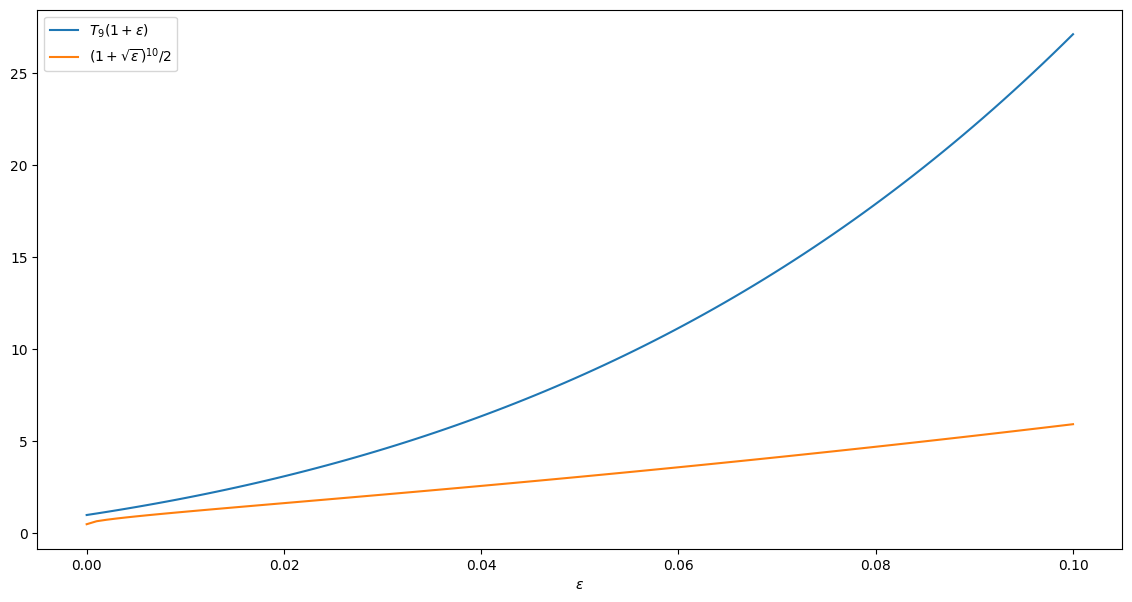

In [61]:
plt.figure(figsize=(14,7))
epsilons = np.linspace(0., 0.1, 100)
plt.xlabel('$\epsilon$')
degree = 9
plt.plot(epsilons, T(degree, 1+epsilons), 
         label=f'$T_{degree}(1+\epsilon)$')
plt.plot(epsilons, (1+epsilons**(1/2))**degree/2, 
         label='$(1+\sqrt{\epsilon})^{10}/2$')
plt.legend();